## Experiment 1 - a single good with fixed odds

__Basic Setup__:

First things first, we consider the simplest situation where a cafe sells only one product (say X). We further assume that every customer always uses the app if it's available. 

- $p = \text{price of one X} = 3.5\$$
- $r = \text{raw cost of one X} = 0.8\$ $

(Source: http://www.cafe-coach.com.au/the-secret-to-real-profits-in-a-cup-of-coffee/)

Every time a customer purchases a cup of coffee, our app offers a voucher with two possible discount rates which occur with different probabilities. To formalise, we define the variables below

- $N = \text{average number of customers per day}$
- $N_{app} = \text{average number of customers with the app per day}$
- $d_W = \text{discount rate of winning}$,  $q_W = \text{probability of winning}$ 
- $d_L = \text{discount rate of losing}$,   $q_L = \text{probability of losing}$ 

For the time being, we assume that the discount rates and winning probability are fixed. Here, discount rate is defined as the ratio of the discounted price with respect to the original price $p$. Hence, if you win a gamble, you can purchase a good X for price $q_W\cdot p$ and if you lose, you get it for $q_L\cdot p$. So, for instance, if you use the app with parameters $d_W = 0.6, q_W = 0.2, d_L = 0.9, q_L = 0.8$, then you win 40% discount off the price $p$ with probability 20% but only 10% off with the remaining probability.    

For the time being we assume that results of a gamble is binary (win or lose), and thus $q_W + q_L = 1$. Also, for the shop to make profits with the discounts, we need to make sure the discounted prices $d_{W}p$ and $d_{L}p$ are above the raw cost $r = 0.8\$$. Also, you should expect better discount rates when you win than when you lose. So, in summary we have:

$$ \frac{r}{p}\approx 0.22857 < d_W < d_L < 1.$$


__Simulation 1.1__: Dependency of $R$ on $d_{W},d_{L}$ and $q_w$

Given the chosen discount scheme (characterised by $d_{W},d_{L}$ and $q_w$), we investigate how much we need to increase the average number of customers to achieve a desired profit increase.

The daily expected profit without the app is given by: $$DEP := N\cdot (p-r).$$ 

Similarly, assuming every customer uses the app after its release, the daily expected profit with the app is given by: $$DEP_{app}:=N_{app}\cdot \Big{[}q_{W}\cdot(d_{W}p - r) + (1-q_{W})\cdot(d_{L}p-r)\Big{]}.$$

Now, say we aim to increase the profits of the shop by the factor of  $\alpha > 1$; we want to ensure the inequality $$ \alpha \cdot DEP < DEP_{app}.$$ To guarantee this happens, we at least need to increase the average number of customers by the factor of: $$ R(\alpha, d_{W},d_{L},q_{W},q_{L}) := \frac{\alpha(p-r)}{\Big{[}q_{W}\cdot(d_{W}p - r) + (1-q_{W})\cdot(d_{L}p-r)\Big{]}}$$

Now, with the chosen discount scheme $(d_{W},d_{L},q_w)$, we want to know by how much we need to increase the number of customers (i.e the value of $R$) so as to achieve the target profit boost $\alpha$. To this end, we look at the surface $R$ as a function of $d_{W},d_{L}$ and $q_w$. However, this is a 4 dimensional surface, and so we assign a fixed value to $q_w$ and only visualise the corresponding landscape of $R$ as a function $d_{W},d_{L}$ (see the figure below). You should try and see how the surface looks as you set different values of $q_w$ in the following code.  

Note. We can similarly model the conventional voucher scheme (in which a fixed rate of discount is guaranteed) as the case where $d_{W} = d_{L}$. 

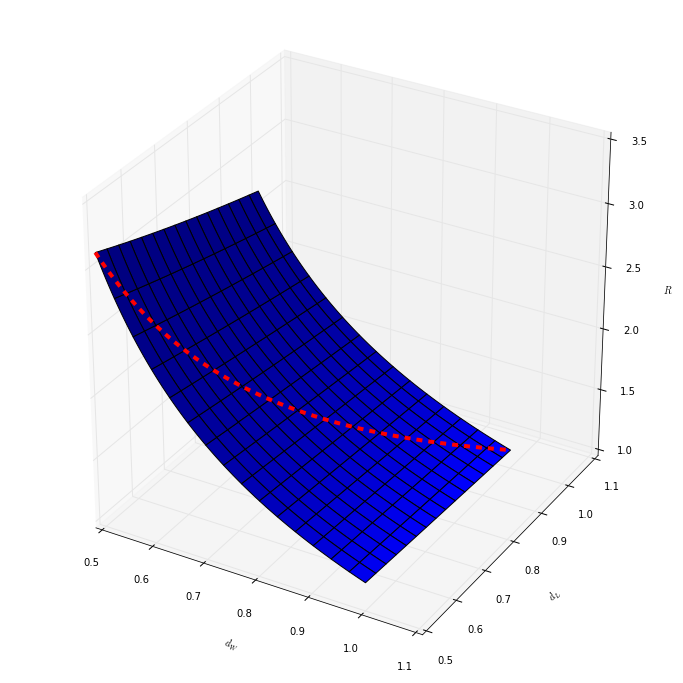

In [7]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import random

#fixed parameters:
p = 3.5
r = 0.8
alpha = 1.1
q_w = 0.9 #winning probability - try different values!

#define R:
def R(alpha,d_w, d_l,q_w):
  return alpha*(p-r)/(q_w*(d_w*p-r)+(1-q_w)*(d_l*p-r))

mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

Start = 0.5 #0.23
End = 1.0#1.0 
d_w = d_l = np.linspace(Start, End, 150)
D_W, D_L = np.meshgrid(d_w, d_l)
Rs = np.array([R(alpha,k1,k2,q_w) for k1,k2 in zip(np.ravel(D_W), np.ravel(D_L))])
#print 'Rs.shape:',Rs.shape
#print 'D_W.shape:', D_W.shape
R = Rs.reshape(D_W.shape)

r = alpha*(p-r)/(q_w*(d_w*p-r)+(1-q_w)*(d_l*p-r))
#print 'size of r:', r.size

ax.plot_surface(D_W, D_L, R)
ax.plot(d_w,d_l,r, color = "red", linestyle = 'dashed', linewidth = 4)

ax.set_xlabel('$d_W$')
ax.set_ylabel('$d_L$')
ax.set_zlabel('$R$')


plt.show()

Since we impose $d_w < d_l$, we are only interested in the upper half of the surface above the dotted line $d_w = d_l$. This provides a landscape of $R$ (minimal increase in the number of customers necessary to ensure profit increase $\alpha$) as a function of $d_w$,$d_l$ and $q_w$. As the discount rates $d_l$ and $d_w$ get closer to the lower bound $r/p$, the value of $R$ tends to infinity as expected. On the other hand, as the winning discount rate $d_w$ gets closer to $1$ (i.e no discounts), the value of $R$ would be exactly $\alpha$: with no discounts, we need to increase the number of customers by the factor of $\alpha$ to achieve profit increase by the factor of $\alpha$. Also notice that the winning probability $q_w$ adjusts the levels of dependecy of R on $d_w$ and $d_l$. For example, the winning probability is very high (say $q_w = 0.99$), the landscape of R is alsmost completely determined by $d_w$, indepent of the value of $d_l$. 

__Simulation 1.2__:

In this section, on the assumption that our app can increase the number of customers by $R>1$, we now look at the set of all possible discount options which can achieve the target profit increase $\alpha$. 

This is equivalent to looking at the cross-section of the surface $R(\alpha, d_{W},d_{L},q_{W},q_{L})$ sliced up at some values of $R$ and $\alpha$. In other words, we are interested in the following set:

$$ D_{\text{options}}(\alpha,R):= \Big{\{}(d_w,d_l,q_w) : \, \frac{N_{app}}{N} = R,\,\,\,\, \alpha \cdot DEP = DEP_{app},\,\,\,\, \frac{r}{p}< d_W < d_L < 1\Big{\}}.$$

After some algebra, you can show that this set is given by: 

\begin{align}
D_{\text{options}}(\alpha,R)&= \Big{\{}(d_w,d_l,q_w) :\, d_w = ad_l + b,\,\, q_w b < d_l < min(a^{-1}(r/p - b),1),\,\, 0<q_w < 1 \Big{\}}\\
&=\bigcup_{0<q_w < 1}\Big{\{}(d_w,d_l,q_w) :\, d_w = ad_l + b,\,\, q_w b < d_l < min(a^{-1}(r/p - b),1) \Big{\}}
\end{align}
where $a = (q_w-1)/q_w$ and $b=(\alpha/R + r(1-\alpha/R)/p)/q_w$. You can further simplify $b$, but did not bother.


The following interactive plot allows you to look at the slice of $D_{\text{options}}(\alpha,R)$ for your chosen value of $q_w$ (select on the slider). -- HOW ABOUT PLOTTING A 3D SURFACE AS WELL???

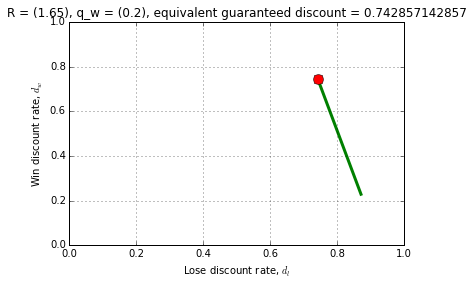

In [8]:
%matplotlib inline
import pylab as plt
import numpy as np
from IPython.html.widgets import interact
import math

def discount_rate(R, q_w):
    p = 3.5
    r = 0.8
    alpha = 1.1
    grad_l = -(1-q_w)/q_w
    intcept_l = (alpha/R + r/p*(1-alpha/R))/q_w
    Start = max(r/p, q_w*intcept_l)
    End = min(1,(r/p - intcept_l)/grad_l)
    d_l = np.linspace(Start, End, 200)
    d_w = grad_l*d_l + intcept_l
    plt.plot(d_l,d_w,'g',linewidth =3)
    nogamble = q_w*intcept_l
    plt.plot(nogamble,nogamble, marker='o',markerfacecolor='red',markersize = 10)
    
    plt.title("R = (%s), q_w = (%s), equivalent guaranteed discount = %s" %(R, q_w, nogamble) )
    plt.grid()
    plt.xlabel('Lose discount rate, $d_l$')
    plt.ylabel('Win discount rate, $d_w$')  
    plt.ylim([0,1])
    plt.xlim([0,1])
    

interact(discount_rate, R=(1.1,2.0,0.05),q_w=(0.0,1.0,0.05)) 

Here, the green line shows the cross-section of $D_{\text{options}}(\alpha,R)$ at a chosen value of winning probability $q_w$. As long as you are on this surface, the profit increase $\alpha$ is guaranteed in expextation assuming the number of customers increase by the factor of $R$. The red marker shows the point where $d_l = d_w$. 

For the given value of $R$, the smaller the winning probability, the more risky the gamble can be made i.e. the larger the difference in discount rates between 'win' and 'lose' (so, if you win, you save a lot).


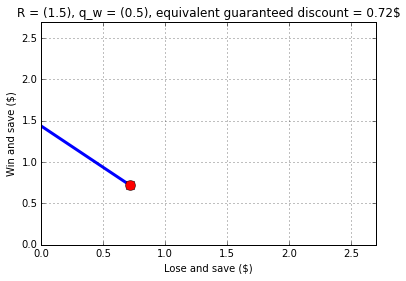

In [9]:
%matplotlib inline
import pylab as plt
import numpy as np
from IPython.html.widgets import interact
import math


def discount_dollars(R, q_w):
    p = 3.5
    r = 0.8
    alpha = 1.10
    grad_l = -(1-q_w)/q_w
    intcept_l = (alpha/R + r/p*(1-alpha/R))/q_w
    Start = max(r/p, q_w*intcept_l)
    End = min(1,(r/p - intcept_l)/grad_l)
    d_l = np.linspace(Start, End, 200)
    d_w = grad_l*d_l + intcept_l
    d_l_dollar = p*(1-d_l)
    d_w_dollar = p*(1-d_w)
    plt.plot(d_l_dollar, d_w_dollar,color = "blue", linewidth = 3)
    nogamble_dollar = p*(1 - q_w*intcept_l)
    plt.plot(nogamble_dollar,nogamble_dollar, marker='o',markerfacecolor='red',markersize = 10)
    
    plt.title("R = (%s), q_w = (%s), equivalent guaranteed discount = %s$" %(R, q_w, nogamble_dollar) )
    plt.xlabel('Lose and save ($)')
    plt.ylabel('Win and save ($)')
    plt.ylim([0,p-r])
    plt.xlim([0,p-r])
    plt.grid()

    #plt.axes([])    

interact(discount_dollars, R=(1.1,2.0,0.05),q_w=(0.0,1.0,0.05)) 

## Experiment 2 - a single good with adaptive odds.

In the previous section, we saw that, given the number of customers increase by $R$, then the profit also increases by $\alpha$ in expectation i.e. $E(DEP_{app}/DEP) = \alpha $ for any discount schemes $(d_w, d_l, q_w) \in D_{\text{options}}(\alpha,R)$. However, in practice, we want to improve the discount options on offer as customers win, to incentivise them to come back. On the other hand, we want to reduce the discount rates if customers lose. To do this, we will vary the target profit increase $\alpha$. This is fine as long as the expected profit increase $E(DEP_{app}/DEP) = E(\alpha)$ (note $\alpha$ is a random variable, not a constant) is sufficiently above $1$ from the shop's point of view.

Let us denote the discount scheme at time $t$ by $(d^{(t)}_w,d^{(t)}_l,q^{(t)}_w)$ and the result of the gamble by $outcome^{(t)}$. Could we come up a reasonable way to determine $(d^{(t+1)}_w,d^{(t+1)}_l,q^{(t+1)}_w)$ on the basis of history $H(t) := \{(d^{(1)}_w,d^{(t)}_l,q^{(1)}_w),outcome^{(1)},...,(d^{(t)}_w,d^{(t)}_l,q^{(t)}_w),outcome^{(t)}\}$? 

_Multi option scheme_: How about letting users choose from several discount options? e.g four options: 'true gambler', 'average gambler','safe player' and 'moral person' with winning probability fixed at $q_w = 25\%$, $50\%$, $75\%$ and $100\%$. For each, we display $(q_w, q_l)$ in the manner that the difference $d_l - d_w$ is increasingly larger for more risky option (i.e. smaller winning probability $q_w$). If you win or lose, you vary the objective $\alpha$ in a range $(1,R)$ and change the discount rates in respective options accordingly. In the event of a win, decrease the alpha i.e. $\alpha^{(t)} > \alpha^{(t+1)}$ and otherwise decrease. The initial value is set to be $R/2$ and the width of increment (the amount by which $\alpha$ changes) is a decreasing function of $q_w$ i.e. the more risky (the less likely to win), the larger change in the next discount options. Discount rates are so far only updated based on the outcome at the previous time step (Markov property), but we could lift this assumption. 



__Simulation 2.1__: 'Multiple option scheme'

In this section, we will investigate the 'Multiple option scheme' discribed above. To continue ...






__Limitations of the current model__:
- assumed every customer uses the app. In reality, some transaction are performed without the app. 
- assumed the shop sell only one product - the extension is very easy though; you just need to have separate systems. 







NOTES:
Interactive plot with python:
see http://moderndata.plot.ly/widgets-in-ipython-notebook-and-plotly/
see https://www.youtube.com/watch?v=wxVx54ax47s
see http://bokeh.pydata.org/en/latest/
